<center><h1>TP2 RCR2:</h1></center>
<center><h2>Controlleur flou</h2></center>

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

p = 5
TC = ctrl.Antecedent(np.arange(20, 80+p, p), 'TC')
NC = ctrl.Antecedent(np.arange(9, 70+p, p), 'NC')
PI = ctrl.Antecedent(np.arange(5, 50+p, p), 'PI')
RC = ctrl.Consequent(np.arange(-80, 70+p, p), 'RC')

# Define membership functions for TC
TC['AV'] = fuzz.trimf(TC.universe, [20, 35, 45])
TC['AC'] = fuzz.trimf(TC.universe, [35, 45, 60])
TC['IN'] = fuzz.trimf(TC.universe, [45, 60, 80])

# Define membership functions for NC
NC['DN'] = fuzz.trapmf(NC.universe, [9, 24, 40, 55])
NC['HN'] = fuzz.trapmf(NC.universe, [40, 55, 60, 70])

# Define membership functions for PI
PI['TG'] = fuzz.trapmf(PI.universe, [5, 10, 15, 20])
PI['GR'] = fuzz.trapmf(PI.universe, [15, 20, 25, 30])
PI['MO'] = fuzz.trapmf(PI.universe, [25, 30, 35, 40])
PI['FA'] = fuzz.trapmf(PI.universe, [35, 40, 45, 50])

# Define membership functions for RC
RC['TF'] = fuzz.trimf(RC.universe, [-80, -50, -10])
RC['FO'] = fuzz.trimf(RC.universe, [-50, -10, 10])
RC['MO'] = fuzz.trimf(RC.universe, [-10, 10, 40])
RC['FA'] = fuzz.trimf(RC.universe, [10, 40, 70])


# Define rules
rule1 = ctrl.Rule(TC['AV'] & NC['DN'] & PI['TG'], RC['FA'])
rule2 = ctrl.Rule(TC['AV'] & NC['DN'] & PI['GR'], RC['FA'])
rule3 = ctrl.Rule(TC['AV'] & NC['DN'] & PI['MO'], RC['MO'])
rule4 = ctrl.Rule(TC['AV'] & NC['DN'] & PI['FA'], RC['FO'])
rule5 = ctrl.Rule(TC['AV'] & NC['HN'] & PI['TG'], RC['MO'])
rule6 = ctrl.Rule(TC['AV'] & NC['HN'] & PI['GR'], RC['MO'])
rule7 = ctrl.Rule(TC['AV'] & NC['HN'] & PI['MO'], RC['FO'])
rule8 = ctrl.Rule(TC['AV'] & NC['HN'] & PI['FA'], RC['TF'])
rule9 = ctrl.Rule(TC['AC'] & NC['DN'] & PI['TG'], RC['FA'])
rule10 = ctrl.Rule(TC['AC'] & NC['DN'] & PI['GR'], RC['MO'])
rule11 = ctrl.Rule(TC['AC'] & NC['DN'] & PI['MO'], RC['MO'])
rule12 = ctrl.Rule(TC['AC'] & NC['DN'] & PI['FA'], RC['FO'])
rule13 = ctrl.Rule(TC['AC'] & NC['HN'] & PI['TG'], RC['MO'])
rule14 = ctrl.Rule(TC['AC'] & NC['HN'] & PI['GR'], RC['FO'])
rule15 = ctrl.Rule(TC['AC'] & NC['HN'] & PI['MO'], RC['FO'])
rule16 = ctrl.Rule(TC['AC'] & NC['HN'] & PI['FA'], RC['TF'])
rule17 = ctrl.Rule(TC['IN'] & NC['DN'] & PI['TG'], RC['FA'])
rule18 = ctrl.Rule(TC['IN'] & NC['DN'] & PI['GR'], RC['MO'])
rule19 = ctrl.Rule(TC['IN'] & NC['DN'] & PI['MO'], RC['MO'])
rule20 = ctrl.Rule(TC['IN'] & NC['DN'] & PI['FA'], RC['FO'])
rule21 = ctrl.Rule(TC['IN'] & NC['HN'] & PI['TG'], RC['MO'])
rule22 = ctrl.Rule(TC['IN'] & NC['HN'] & PI['GR'], RC['FO'])
rule23 = ctrl.Rule(TC['IN'] & NC['HN'] & PI['MO'], RC['TF'])
rule24 = ctrl.Rule(TC['IN'] & NC['HN'] & PI['FA'], RC['TF'])

# Create control system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, 
                           rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16,
                           rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24])
sim = ctrl.ControlSystemSimulation(system)

# Function to compute center of gravity
def compute_result(tc_val, nc_val, pi_val):
    sim.input['TC'] = tc_val
    sim.input['NC'] = nc_val
    sim.input['PI'] = pi_val
    sim.compute()
    return sim.output['RC']

print(f"{RC.defuzzify_method=}")

# Example usage:
values = {'TC': 52, 'NC': 42, 'PI': 17}
result = compute_result(values['TC'], values['NC'], values['PI'])
print(f"Center of gravity: {result}")

RC.defuzzify_method='centroid'
Center of gravity: 21.0946776585837


In [97]:
fuzz.interp_membership(RC.universe, RC['FO'].mf, 0)

0.5

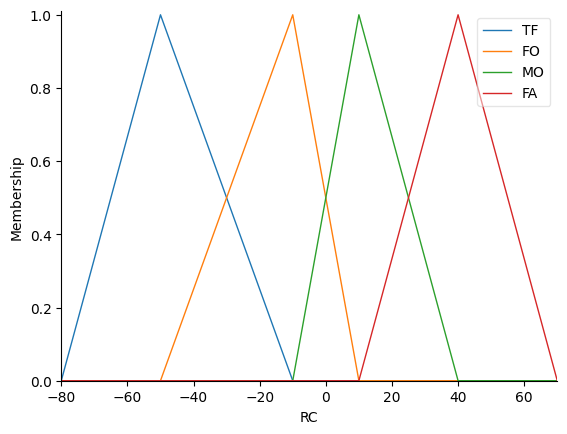

In [10]:
RC.view()

In [77]:
sim.print_state()

 Antecedents 
Antecedent: TC                      = 52
  - AV                              : 0.0
  - AC                              : 0.5333333333333333
  - IN                              : 0.4666666666666667
Antecedent: NC                      = 42
  - DN                              : 0.84
  - HN                              : 0.15999999999999998
Antecedent: PI                      = 17
  - TG                              : 0.6
  - GR                              : 0.4
  - MO                              : 0.0
  - FA                              : 0.0

 Rules 
RULE #0:
  IF (TC[AV] AND NC[DN]) AND PI[TG] THEN RC[FA]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - TC[AV]                                                 : 0.0
  - NC[DN]                                                 : 0.84
  - PI[TG]                                                 : 0.6
                            (TC[AV] AND NC[DN]) AND PI[TG] = 0.0
  Activation (THE

In [113]:
def singlmf(x,a,f):
    t = np.zeros(len(x))
    t[(a - x[0])//(x[1] - x[0])] = f
    return t

RC.universe,singlmf(RC.universe, 0, 10)

(array([-80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20,
        -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,  45,
         50,  55,  60,  65,  70]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]))

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

h = ctrl.Antecedent(np.arange(75, 85.1, 0.1), 'h') 
dh = ctrl.Antecedent(np.arange(-0.9, 1.21, 0.01), 'dh') 
u = ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'u') 

h['petit'] = fuzz.trapmf(h.universe, [75, 77, 78, 79])
h['moyen'] = fuzz.trapmf(h.universe, [78, 79, 81, 83])
h['haut'] = fuzz.trapmf(h.universe, [80, 83, 85, 85])

dh['tres_negatif'] = fuzz.trimf(dh.universe, [-0.9, -0.7, -0.3])
dh['negatif'] = fuzz.trimf(dh.universe, [-0.4, 0, 0.2])
dh['positif'] = fuzz.trimf(dh.universe, [0, 0.4, 0.6])
dh['tres_positif'] = fuzz.trimf(dh.universe, [0.5, 0.8, 0.8])

u['bas'] = fuzz.trimf(u.universe, [-1, -0.4, -0.2])
u['moyen_haut'] = fuzz.trimf(u.universe, [-0.4, 0, 0.8])
u['haut'] = fuzz.trimf(u.universe, [0.2, 0.8, 1])

rule1 = ctrl.Rule(h['petit'] & dh['tres_negatif'], u['haut'])
rule2 = ctrl.Rule(h['petit'] & dh['negatif'], u['haut'])
rule3 = ctrl.Rule(h['petit'] & dh['positif'], u['haut'])
rule4 = ctrl.Rule(h['petit'] & dh['tres_positif'], u['moyen_haut'])

rule5 = ctrl.Rule(h['moyen'] & dh['tres_negatif'], u['haut'])
rule6 = ctrl.Rule(h['moyen'] & dh['negatif'], u['haut'])
rule7 = ctrl.Rule(h['moyen'] & dh['positif'], u['bas'])
rule8 = ctrl.Rule(h['moyen'] & dh['tres_positif'], u['bas'])

rule9 = ctrl.Rule(h['haut'] & dh['tres_negatif'], u['bas'])
rule10 = ctrl.Rule(h['haut'] & dh['negatif'], u['bas'])
rule11 = ctrl.Rule(h['haut'] & dh['positif'], u['bas'])
rule12 = ctrl.Rule(h['haut'] & dh['tres_positif'], u['bas'])

valve_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, 
     rule4, rule5, rule6, 
     rule7, rule8, rule9,
     rule10, rule11, rule12])

valve = ctrl.ControlSystemSimulation(valve_ctrl)

valve.input['h'] = 81.5
valve.input['dh'] = 0.1

valve.compute()

valve.output['u'] # resultat de la simulation

print(f"For h = 81.5 and dh = 0.1:")
print(f"Control output u = {valve.output['u']:.3f}")

print(f'{u.defuzzify_method=}')

For h = 81.5 and dh = 0.1:
u.defuzzify_method='centroid'
Control output u = 0.044


C:\Users\djad PC\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


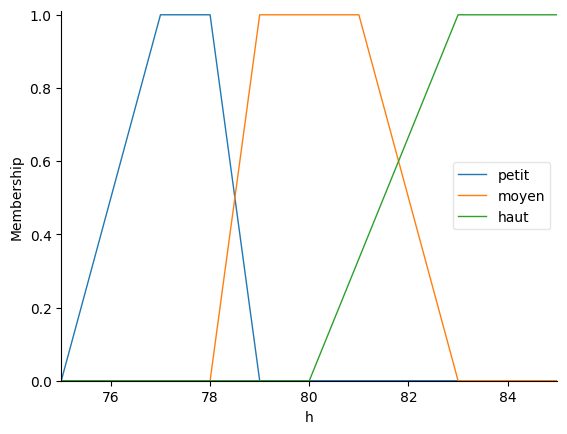

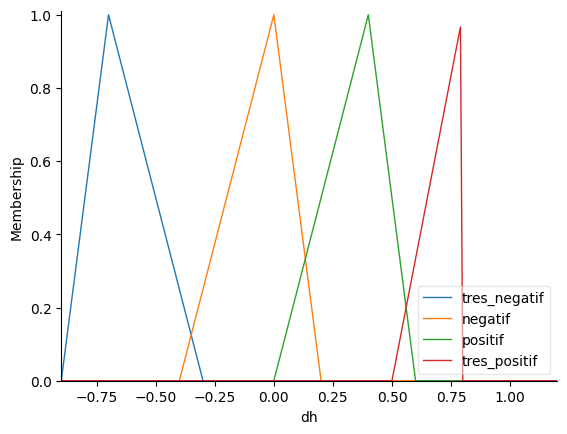

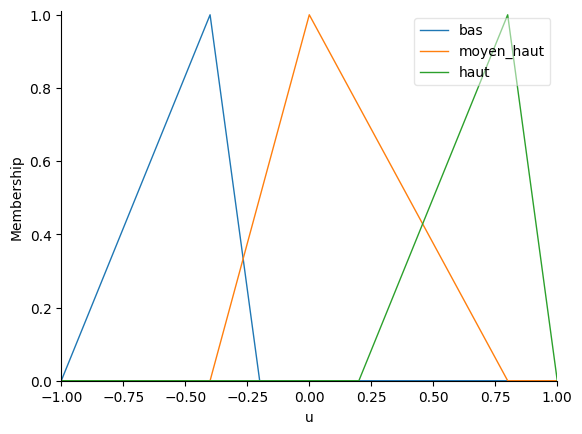

In [11]:
# Optional: Visualize the membership functions
h.view()
dh.view()
u.view()

# Example

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 121, 1), 'waiting_time')
emergency_vehicle = ctrl.Antecedent(np.arange(0, 2, 1), 'emergency_vehicle')

# Define output variable
green_light_duration = ctrl.Consequent(np.arange(10, 121, 1), 'green_light_duration')

# Fuzzy membership functions for traffic density (0-100 vehicles)
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 10, 40])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [30, 50, 80])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [60, 100, 100])

# Fuzzy membership functions for waiting time (0-120 seconds)
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 10, 40])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [30, 60, 90])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [80, 120, 120])

# Fuzzy membership functions for emergency vehicle presence (binary: 0 or 1)
emergency_vehicle['no'] = fuzz.trimf(emergency_vehicle.universe, [0, 0, 1])
emergency_vehicle['yes'] = fuzz.trimf(emergency_vehicle.universe, [0, 1, 1])

# Fuzzy membership functions for green light duration (10-120 seconds)
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [10, 20, 40])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [30, 60, 90])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [80, 120, 120])

# Define fuzzy rules
rule1 = ctrl.Rule(traffic_density['high'] & waiting_time['long'] & emergency_vehicle['yes'], green_light_duration['long'])
rule2 = ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium'])
rule3 = ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short'])
rule4 = ctrl.Rule(traffic_density['low'] & emergency_vehicle['yes'], green_light_duration['medium'])
rule5 = ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long'])
rule6 = ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short'])

# Create and simulate fuzzy control system
traffic_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
traffic_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Set input values
traffic_simulation.input['traffic_density'] = 35  # e.g., 35 vehicles
traffic_simulation.input['waiting_time'] = 45     # e.g., 45 seconds
traffic_simulation.input['emergency_vehicle'] = 0 # no emergency vehicle

# Compute the fuzzy output
traffic_simulation.compute()

# Print the output
print(f"Recommended green light duration: {traffic_simulation.output['green_light_duration']:.2f} seconds")

Recommended green light duration: 60.00 seconds


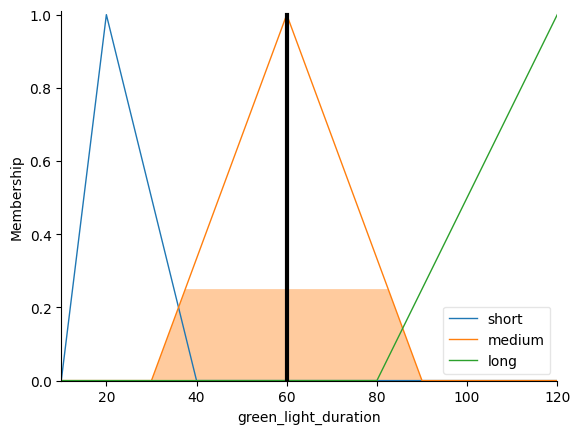

In [3]:
# Visualize the result
green_light_duration.view(sim=traffic_simulation)